### <font color='#005b96'>Data Science Aplicada à Área de Saúde</font><br>
><font color='#438496'>***DS 1c*** **| Doenças Cardíacas :** Machine Learning (*ML*) & Métricas de Avaliação - 1</font>
<br>
><font color='#438496'>professor *Rodrigo Signorini*</font>

### <font color='#005b96'>Table of Contents</font>

- [Motivação](#Motivação)
- [Problema](#Problema)
- [Base de Dados](#Base_de_Dados)
- [Configurando o Ambiente](#Configurando_o_Ambiente)
- [Importando os Dados](#Importando_os_Dados)
- [Obtendo Informações Iniciais](#Obtendo_Informações_Iniciais)
- [Editando o Nome das *Features*](#Editando_o_Nome_das_*Features*)
- [Machine Learning (*ML*)](#Machine_Learning_(*ML*))
    - [*k-NN (k-nearest neighbors)*](#*k-NN_(k-nearest_neighbors)*)
    - [Amostragem *Holdout*](#Amostragem_*Holdout*)
    - [*Data Leakage*](#*Data_Leakage*)
    - [Scaling](#Scaling)
    - [Definindo *Datasets*](#Definindo_*Datasets*)

---
### <a id = "Motivação"><font color='#005b96'>Motivação</font></a>

- **Cenário Global**

Segundo a *World Health Organization*, as doenças cardiovasculares (DCVs) são a principal causa de morte no mundo todo, com cerca de 17,9 milhões por ano. Mais de quatro em cada cinco mortes por DCVs têm como causas principais ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade.

> - cerca de 17,9 milhões de pessoas morrem de doenças cardiovasculares por ano
>
> - Mortes por DVCs representam cerca de 32% de todas as causas de mortes

- **Cenário Estados Unidos**

Em 2018, o *Center for Disease Control and Prevention (CDC)* classificou as doenças cardíacas como a principal causa de mortalidade nos Estados Unidos e continua a classificá-la como tanto até os dias de hoje. Devido à complexidade e às variações do número crescente de fatores de risco, o uso de técnicas avançadas como *Machine Learning* vem sendo empregadas para auxiliar no combate contra doenças cardíacas e derrames. Segundo o site da *American Heart Association*, de fevereiro de 2018 até o momento, já houve uma redução de 15,1% nas mortes por doenças cardíacas nos Estados Unidos.

> - cerca de 1 ataque cardíaco a cada 40 segundos
>
> - cerca de 805.000 americanos têm 1 ataque cardíaco por ano
>
> - cerca de 47% de todos os americanos têm pelo menos 1 dos 3 principais fatores de risco para doenças cardíacas: pressão alta, colesterol alto e diabetes

Identificar aqueles com maior risco de DCVs e garantir que eles recebam tratamento adequado pode prevenir mortes prematuras. O acesso a medicamentos para doenças não transmissíveis e tecnologias básicas de saúde em todas as unidades básicas de saúde é essencial para garantir que os necessitados recebam tratamento e aconselhamento.

---
### <a id = "Problema"><font color='#005b96'>Problema</font></a>

Desenvolver um modelo preditivo que seja capaz de predizer a presença de doenças cardíacas.

---
### <a id = "Base_de_Dados"><font color='#005b96'>Base de Dados</font></a>

O conjunto de dados é composto por 303 amostras - onde cada amostra representa um paciente distinto -, com 14 características - onde 13 delas são consideradas relevantes como preditores de doenças cardíacas -, e 1 é a própria indicação da presença ou não da doença.

Origem:

1. University of California Irvine (UCI) Machine Learning Repository

Creators:

1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

<sub><font color='black'>*Para fins meramente didáticos, esse conjunto de dados recebeu algumas edições, as quais não inferem prejuízo algum quanto à íntegra das informações contidas no mesmo.*</font></sub>

|Feature|Description|
|-------|-----------|
|Age|Age of patient (in years)|
|Sex|Sex of patient|
|CP type|Chest Pain type|
|SBP (at rest)|Resting Blood Pressure (in mm Hg)|
|Cholesterol (total)|Cholestoral (in mg/dl)|
|FBS Test|Fasting Blood Sugar (if > 120 mg/dl)|
|ECG (at rest)|Resting Electrocardiographic results|
|HRmax|Maximum Heart Rate achieved during the patient's Stress Testing|
|Angina (exercise-induced)|Exercise Induced Angina|
|ST Depression (exercise-induced)|ST depression induced by exercise relative to rest|
|ST Slope (at peak exercise)|Slope of the Peak Exercise ST segment|
|N of Major Vessels (flourosopy)|Number of major vessels (0-3) colored by flourosopy|
|Thallium ST|Thallium Stress Test|
|Diagnosis (multiclass)|Absence or presence of heart desease|

---
### <a id = "Configurando_o_Ambiente"><font color='#005b96'>Configurando o Ambiente</font></a>

In [ ]:
# importing numpy
import numpy as np

# importing pandas
import pandas as pd

# Sets the maximum number of rows and columns displayed ('None' value means unlimited)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# importing matplotlib
import matplotlib.pyplot as plt

# %matplotlib inline

# Matplotlib's runtime configuration (rc) to customize default settings
plt.rcParams["figure.figsize"] = [6, 3]

---
### <a id = "Importando_os_Dados"><font color='#005b96'>Importando os Dados</font></a>

In [ ]:
# importing data (from a csv file into DataFrame)
df_raw = pd.read_csv('Classification_Diagnosis_of_Heart_Disease_DataPrep_v03.csv')

---
### <a id = "Obtendo_Informações_Iniciais"><font color='#005b96'>Obtendo Informações Iniciais</font></a>

In [ ]:
# Usando head() para visualizar as 5 primeiras linhas do DataFrame (default)
df_raw.head()

,Age,SBP (at rest),Cholesterol (total),ECG (at rest),HRmax,ST Depression (exercise-induced),N of Major Vessels (flourosopy),Thallium ST,Diagnosis (binary),CP type_asymptomatic,CP type_atypical angina,CP type_non-anginal pain,CP type_typical angina,ST Slope_downsloping,ST Slope_flat,ST Slope_upsloping,Sex_male,FBS Test_True,Angina_yes,"Age_(28.0, 48.0]","Age_(48.0, 56.0]","Age_(56.0, 61.0]","Age_(61.0, 77.0]"
0,63,145,233,1,150,2.3,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
1,67,160,286,1,108,1.5,3,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
2,67,120,229,1,129,2.6,2,2,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
3,37,130,250,0,187,3.5,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,41,130,204,1,172,1.4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
# Usando shape para obter as dimensões do DataFrame
df_raw.shape

(297, 23)

---
### <a id = "Editando_o_Nome_das_*Features*"><font color='#005b96'>Editando o Nome das *Features*</font></a>

In [ ]:
df_01 = df_raw.copy()

In [ ]:
df_01.columns

Index(['Age', 'SBP (at rest)', 'Cholesterol (total)', 'ECG (at rest)', 'HRmax',
       'ST Depression (exercise-induced)', 'N of Major Vessels (flourosopy)',
       'Thallium ST', 'Diagnosis (binary)', 'CP type_asymptomatic',
       'CP type_atypical angina', 'CP type_non-anginal pain',
       'CP type_typical angina', 'ST Slope_downsloping', 'ST Slope_flat',
       'ST Slope_upsloping', 'Sex_male', 'FBS Test_True', 'Angina_yes',
       'Age_(28.0, 48.0]', 'Age_(48.0, 56.0]', 'Age_(56.0, 61.0]',
       'Age_(61.0, 77.0]'],
      dtype='object')

In [ ]:
# renaming columns
col_names = {'SBP (at rest)' : 'SBP',
             'Cholesterol (total)' : 'Cholesterol',
             'ECG (at rest)' : 'ECG',
             'Angina (exercise-induced)_yes' : 'Angina_yes',
             'ST Depression (exercise-induced)' : 'STdep',
             'N of Major Vessels (flourosopy)' : 'Vessels',
             'Thallium ST' : 'Thallium',
             'Diagnosis (binary)' : 'Desease',
             'CP type_asymptomatic' : 'CP_asy',
             'CP type_atypical angina' : 'CP_aty',
             'CP type_non-anginal pain' : 'CP_non',
             'CP type_typical angina' : 'CP_typ',
             'ST Slope_downsloping' : 'STslo_down',
             'ST Slope_flat' : 'STslo_flat',
             'ST Slope_upsloping' : 'STslo_up',
             'FBS Test_True' : 'FBS_true'}

df_01.rename(col_names, axis=1, inplace=True)
df_01.head()

,Age,SBP,Cholesterol,ECG,HRmax,STdep,Vessels,Thallium,Desease,CP_asy,CP_aty,CP_non,CP_typ,STslo_down,STslo_flat,STslo_up,Sex_male,FBS_true,Angina_yes,"Age_(28.0, 48.0]","Age_(48.0, 56.0]","Age_(56.0, 61.0]","Age_(61.0, 77.0]"
0,63,145,233,1,150,2.3,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
1,67,160,286,1,108,1.5,3,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
2,67,120,229,1,129,2.6,2,2,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
3,37,130,250,0,187,3.5,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,41,130,204,1,172,1.4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


---
### <a id = "Machine_Learning_(*ML*)"><font color='#005b96'>Machine Learning (*ML*)</font></a>

<b>O que é um Modelo?</b>

Um modelo estatístico é uma representação matemática ou probabilística de um evento. É tipicamente uma simplificação dos fatos reais, que expressa por meio de termos matemáticos ou probabilísticos as principais relações entre as variáveis relevantes ao objeto de estudo, tornado então possível um maior grau de compreensão sobre essas relações e, consequentemente, a possibilidade de inferências preditivas.

É uma ferramenta extremamente valiosa para qualquer área, pois habilita a tomada de decisões baseada em dados.

***Machine Learning (ML)*** - Aprendizado de Máquina - é um subcampo da Inteligência Artificial onde são utlizados algoritmos cujo propósito é possibilitar que máquinas possam aprender a atingir um objetivo da forma mais acurada possível a partir da identificação de relacionamentos entre os dados, ao invés de serem programadas de forma explícita para tanto.

É importante ressaltar que ***ML*** é baseado na premissa de que há relacionamentos entre os dados e que esses relacionamentos possam se repitir de maneira recorrente e, de preferência, consistente. Sendo assim, devemos entender e nos referir a esses relacionamentos como **padrões**.

>***Machine Learning (ML)*** - Aprendizado de Máquina - é um sistema computacional que busca realizar uma tarefa **T**, aprendendo a partir de uma experiência **E**, procurando melhorar uma performance **P**.

<div class="alert alert-block alert-warning">
<b>IMPORTANTE:</b>
    
Um <b>modelo de <i>Machine Learning</i></b> é o resultado do processamento dos dados que são disponibilizados para um algoritmo de <i>Machine Learning os processar</i>.
</div>

É uma das tecnologias atuais mais fascinantes e seu poder é realmente significativo, pois é capaz de se adaptar conforme vai sendo exposta a novos dados - o que a torna um sistema dinâmico e menos dependente da intervenção humana - e sua demanda aumenta exponencialmente à medida que novos dados vão sendo gerados e armazenados e a capacidade de processamento computacional siga aumentando.

Enfim, devemos assimilar definitivamente o conceito de que com um determinado volume de **dados com qualidade**, isso é, que sejam realmente representativos tanto horizontalmente (linhas/amostras) quanto verticalmente (colunas/variáveis), a máquina possa ser capaz de aprender quais padrões possam melhor explicar um determinado objetivo – **tarefa T** , assim como também devemos assimilar definitivamente o conceito de que a máquina possa performar cada vez melhor em seu aprendizado conforme vamos lhe apresentando cada vez mais **dados com qualidade**, pois com a agregação de mais cenários e mais amostras de padrões ela tenderá a **generalizar** com mais eficiência para situações ainda não experenciadas. De fato, quanto mais dados – **experiência E** –, melhores serão os resultados – **performance P**.

No universo do ***ML***, as variáveis contidas em um conjunto de dados podem ser divididas em dois subtipos: ***Target*** e ***Features***.

>- ***Target*** é a variável que representa o nosso objetivo, o nosso problema de negócio. Em um problema que envolva uma abordagem preditiva, é a variável a ser predita.
>>*Sinônimos: variável dependente (dependent variable), variável a ser predita (variable to be predicted), variável explicada (explained variable), variável de saída (output variable).*
>
>- ***Features*** são variáveis potencialmente relacionadas à variável *target*, as quais teriam certa capacidade para explicar o fato. Essa referida relação pode ser forte, fraca ou mesmo inexistente, dependendo das circunstâncias.
>>*Sinônimos: variáveis independentes (independent variables), variáveis preditoras (predictor variables), variáveis explicativas (explanatory variables), variáveis de entrada (input variables).*

Essa divisão dos subtipos de variáveis descrita acima é o caso de nosso problema de negócio aqui proposto, isso é, predizer em um paciente a ocorrência ou não de doença cardíaca (*target*) através de algumas características mapeadas (*features*). Sendo assim, estamos diante de uma abordagem de **Aprendizagem Supervisionada** *(Supervised Learning)*.

>**Aprendizagem Supervisionada** *(Supervised Learning)*: Predizer uma variável dependente (*target*) a partir de variáveis independentes (*features*).

No âmbito da Aprendizagem Supervisionada, estamos diante de problemas de **regressão** e **classificação**.

>- Em um problema de **regressão**, nosso objetivo é predizer os resultados tendo como saída (*target*) valores contínuos, ou seja, estamos tentando mapear variáveis de entrada (*features*) para alguma função que melhor <b>aproxime</b> os valores a serem preditos.
>
>- Em um problema de **classificação**, nosso objetivo é predizer os resultados tendo como saída (*target*) valores categóricos, ou seja, estamos tentando mapear variáveis de entrada (*features*) para alguma função que melhor <b>separe</b> as categorias a serem preditas.

Por meio da **AED** realizada, observamos que as variáveis preditoras apresentam características variadas em termos de relacionamento com a *target*. características essas como **linearidade**, **monotocidade** e **não linearidade**. Ainda, observamos diferentes tipos de distribuição de valores entre essas variáveis. Diante desse fato, iniciaremos nosso processo de geração de um modelo abordando o algoritmo ***kNN*** *(k-nearest neighbors)* - k-vizinhos mais próximos - o qual pode capturar relacionamentos complexos sem assumir formas funcionais específicas.

#### <a id = "*k-NN_(k-nearest_neighbors)*"><font color='#005b96'>*k-NN (k-nearest neighbors)*</font></a>

***k-NN*** é um dos algoritmos mais simples de se entender e de se implementar quando estamos tratando de aprendizagem supervisionada, tanto para problemas de regressão quanto para problemas de classificação.

O *k-NN* é um algoritmo do tipo *lazy learning*, o que significa que na fase de treinamento ele simplesmente armazena os dados na memória (treinamento rápido) e, ao receber uma nova amostra de daodos, analisa a similaridade (ou dissimilaridade) entre essa nova amostra e os dados armazenados na memória para então realizar uma predição, isso é, não há um modelo a ser criado até o instante em que uma predição é necessária (predição lenta). O *k-NN* também não faz quaisquer suposições teóricas típicas sobre os dados quanto à distribuição dos mesmos ou se são linearmente separáveis ou não, o que faz dele um algoritmo não paramétrico.

Isso não significa que utilizar o *k-NN* seja um procedimento isento de pontos crítcos quanto ao pré-processamento dos dados, pois a qualidade das predições depende principalmente da forma como a magnitude das *features* são tratadas - se escalonadas ou não (*scaling*) -, de qual medida de distância será adotada - se distância *Euclidiana*, *Manhattan*, etc - e de qual o valor a ser utilizado como *k*.

Para que possamos proseguir, precisamos definir quem são as variáveis preditoras (*features*) e a variável a ser predita (*target*).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [ ]:
X = df_01.drop(labels='Desease', axis=1)
y = df_01.loc[:, 'Desease'] # usando loc() para slice (nesse caso, retorna uma Series)

#### <a id = "Amostragem_*Holdout*"><font color='#005b96'>Amostragem *Holdout*</font></a>

Para uma correta aplicação das técnicas de ***ML*** visando o desenvolvimento de um modelo preditivo, devemos particionar o conjunto de dados (*dataset*) em **dados de treino** (*train set*) e **dados de teste** (*test set*), o que envolve escolher uma porcentagem do *dataset* para cada um desses *subsets*.

>- **dados de treino** (*train set*): parte do *dataset* (*subset*) que será utilizado para o aprendizado.
>
>- **dados de teste** (*test set*): parte do *dataset* (*subset*) que será utilizado para avaliar a qualidade do aprendizado.

Após o algoritmo aprender com os dados de treino sobre os relacionamentos entre as *features* e o *target* e gerar o modelo, utilizam-se os dados de teste para que o modelo gerado durante o aprendizado faça as predições e então as comparare com as respostas previamente conhecidas para que se possa então avaliar a efetividade do aprendizado realizado, onde a diferença entre o predito e o real constitui uma medida de erro.

Através do *scikit-learn*, uma divisão aleatória em conjuntos de dados de treino e teste pode ser calculada rapidamente com a função ***train_test_split()***.

In [ ]:
'''
Split arrays or matrices into random train and test subsets.
'''
from sklearn.model_selection import train_test_split

In [ ]:
'''
stratify=y : each set contains approximately the same percentage of samples of each target class as the complete set.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
X_train.shape

(222, 22)

In [ ]:
X_test.shape

(75, 22)

#### <a id = "*Data_Leakage*"><font color='#005b96'>*Data Leakage*</font></a>
    
Em *Machine Learning*, vazamento de dados (*data leakage*) é o uso de informações no processo de treinamento do modelo que não deveriam estar disponíveis no momento da predição, fazendo com que as performances preditivas se tornem superestimadas, não sendo igualmente reproduzidas quando expostas a novos dados, como por exemplo em um ambiente de produção.

O vazamento de dados pode ocorrer muito facilmente no processo de *Machine Learning* e esse **erro** é cometido com muita
frequência.

##### Evitando o vazamento de dados

O típico caso de se utilizar algumas técnicas estatísticas para normalizar ou padronizar um conjunto de dados por inteiro antes de se realizar a separação entre dados de treino e teste exemplifica que foi cometido um **erro** grave de vazamento de dados, o que poderá acarretar em sérios problemas não só para quem o comete, mas principalmente para quem irá utilizar o modelo como solução.

Vários processos de reescalonamento de dados (*scaling*) detêm o "conhecimento" das estatísticas de um conjunto de dados ao se calcular os fatores de dimensionamento (como por exemplo valores mínimos, máximos, médias e desvios padrão). Sendo assim, esse "conhecimento" estará compartilhado tanto em seu conjunto de dados de treino quanto no de teste, causando então o vazamento de dados. Um processo isento de vazamentos obrigatoriamente calcula os parâmetros no conjunto de dados de treino, reescala seus valores e então aplica esses parâmetros "aprendidos" para reescalar os dados do conjunto de dados de teste.

Para evitar o vazamento de dados, e estando o conjunto de dados separados em conjunto de dados de treino (aqui denominado *X_train*) e em conjunto de dados de teste (aqui denominado *X_test*), o correto é aprender os parâmetros dos dados de treino e os transformar (utilizando *fit_transform*) e aplicar apenas a transformação pelos parâmetros aprendidos nos dados de teste (utilizando *transform*).

> **fit_transform(X_train)**: aprende os parâmetros de treino e os transforma.
>
> **transform(X_test)**: transforma os dados de teste por meio dos parâmteros aprendidos nos dados de treino.

#### <a id = "*Scaling*"><font color='#005b96'>*Scaling*</font></a>

In [ ]:
'''
MinMaxScaler : Transform features by scaling each feature to a given range
'''
from sklearn.preprocessing import MinMaxScaler

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [ ]:
df_01.head()

,Age,SBP,Cholesterol,ECG,HRmax,STdep,Vessels,Thallium,Desease,CP_asy,CP_aty,CP_non,CP_typ,STslo_down,STslo_flat,STslo_up,Sex_male,FBS_true,Angina_yes,"Age_(28.0, 48.0]","Age_(48.0, 56.0]","Age_(56.0, 61.0]","Age_(61.0, 77.0]"
0,63,145,233,1,150,2.3,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1
1,67,160,286,1,108,1.5,3,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
2,67,120,229,1,129,2.6,2,2,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
3,37,130,250,0,187,3.5,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
4,41,130,204,1,172,1.4,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0


In [ ]:
col_names = ['Age', 'SBP', 'Cholesterol', 'ECG', 'HRmax', 'STdep', 'Vessels', 'Thallium']
col_names_sca = ['Age_sca', 'SBP_sca', 'Cholesterol_sca', 'ECG_sca', 'HRmax_sca', 'STdep_sca', 'Vessels_sca', 'Thallium_sca']

train_raw = X_train[col_names].values
test_raw = X_test[col_names].values

# transformer = MinMaxScaler()
transformer = MinMaxScaler(clip=True)

train_sca = transformer.fit_transform(train_raw)
X_train[col_names_sca] = train_sca
test_sca = transformer.transform(test_raw)
X_test[col_names_sca] = test_sca

In [ ]:
X_test.head()

,Age,SBP,Cholesterol,ECG,HRmax,STdep,Vessels,Thallium,CP_asy,CP_aty,CP_non,CP_typ,STslo_down,STslo_flat,STslo_up,Sex_male,FBS_true,Angina_yes,"Age_(28.0, 48.0]","Age_(48.0, 56.0]","Age_(56.0, 61.0]","Age_(61.0, 77.0]",Age_sca,SBP_sca,Cholesterol_sca,ECG_sca,HRmax_sca,STdep_sca,Vessels_sca,Thallium_sca
112,43,132,341,1,136,3.0,0,2,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0.209302,0.358491,0.490868,0.5,0.438095,0.483871,0.000000,1.0
192,67,100,299,1,125,0.9,2,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0.767442,0.056604,0.394977,0.5,0.333333,0.145161,0.666667,0.0
64,54,120,188,0,113,1.4,1,2,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0.465116,0.245283,0.141553,0.0,0.219048,0.225806,0.333333,1.0
27,66,150,226,0,114,2.6,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0.744186,0.528302,0.228311,0.0,0.228571,0.419355,0.000000,0.0
242,67,120,237,0,71,1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0.767442,0.245283,0.253425,0.0,0.000000,0.161290,0.000000,0.0


In [ ]:
'''
Write object to a comma-separated values (csv) file
'''
y_train.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_y_trainset.csv', index=False)
y_test.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_y_testset.csv', index=False)

#### <a id = "Definindo_*Datasets*"><font color='#005b96'>Definindo *Datasets*</font></a>

##### set 01

In [ ]:
col_names = ['Age', 'SBP', 'Cholesterol', 'ECG', 'HRmax', 'STdep', 'Vessels', 'Thallium',
             'CP_asy', 'CP_aty', 'CP_non', 'CP_typ',
             'STslo_down', 'STslo_flat', 'STslo_up',
             'Sex_male', 'FBS_true', 'Angina_yes']

X_train_set_01 = X_train.loc[:, col_names]
X_test_set_01 = X_test.loc[:, col_names]

<Axes: >

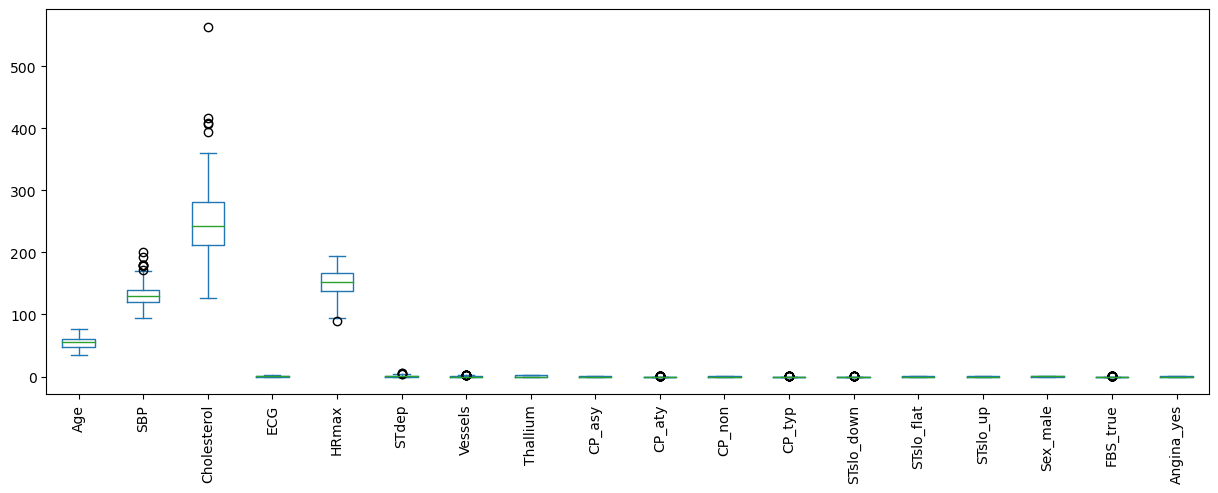

In [ ]:
X_train_set_01.plot.box(rot=90, figsize=(15, 5))

<Axes: >

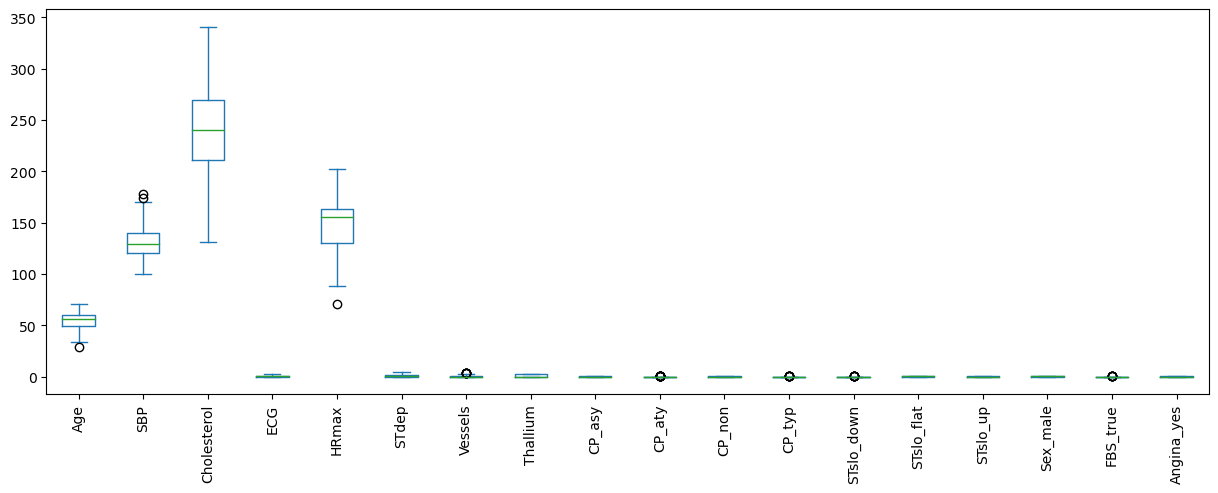

In [ ]:
X_test_set_01.plot.box(rot=90, figsize=(15, 5))

In [ ]:
'''
Write object to a comma-separated values (csv) file
'''
X_train_set_01.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_trainset01.csv', index=False)
X_test_set_01.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_testset01.csv', index=False)

##### set 02

In [ ]:
col_names = ['Age_sca', 'SBP_sca', 'Cholesterol_sca', 'ECG_sca', 'HRmax_sca', 'STdep_sca', 'Vessels_sca', 'Thallium_sca',
             'CP_asy', 'CP_aty', 'CP_non', 'CP_typ',
             'STslo_down', 'STslo_flat', 'STslo_up',
             'Sex_male', 'FBS_true', 'Angina_yes']

X_train_set_02 = X_train.loc[:, col_names]
X_test_set_02 = X_test.loc[:, col_names]

<Axes: >

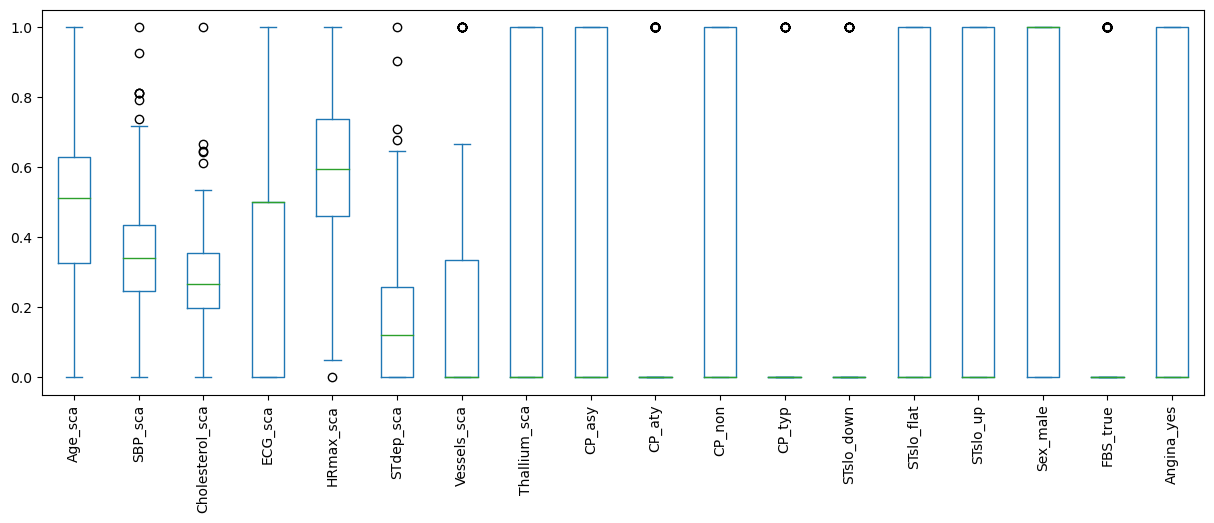

In [ ]:
X_train_set_02.plot.box(rot=90, figsize=(15, 5))

<Axes: >

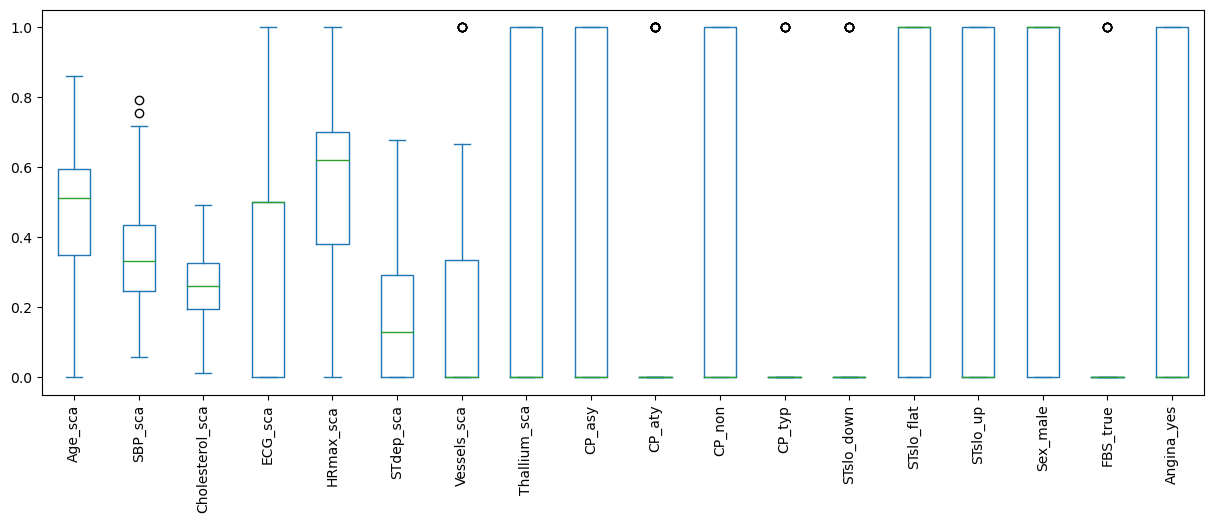

In [ ]:
X_test_set_02.plot.box(rot=90, figsize=(15, 5))

In [ ]:
'''
Write object to a comma-separated values (csv) file
'''
X_train_set_02.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_trainset02.csv', index=False)
X_test_set_02.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_testset02.csv', index=False)

##### set 03

In [ ]:
col_names = ['Age_(28.0, 48.0]', 'Age_(48.0, 56.0]', 'Age_(56.0, 61.0]', 'Age_(61.0, 77.0]',
             'SBP_sca', 'Cholesterol_sca', 'ECG_sca', 'HRmax_sca', 'STdep_sca', 'Vessels_sca', 'Thallium_sca',
             'CP_asy', 'CP_aty', 'CP_non', 'CP_typ',
             'STslo_down', 'STslo_flat', 'STslo_up',
             'Sex_male', 'FBS_true', 'Angina_yes']

X_train_set_03 = X_train.loc[:, col_names]
X_test_set_03 = X_test.loc[:, col_names]

<Axes: >

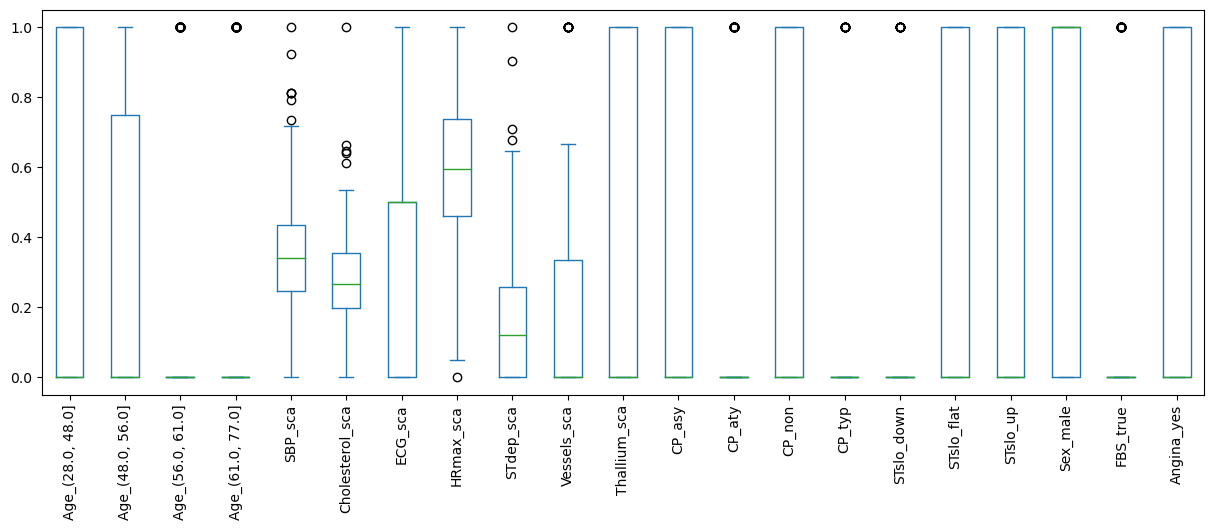

In [ ]:
X_train_set_03.plot.box(rot=90, figsize=(15, 5))

<Axes: >

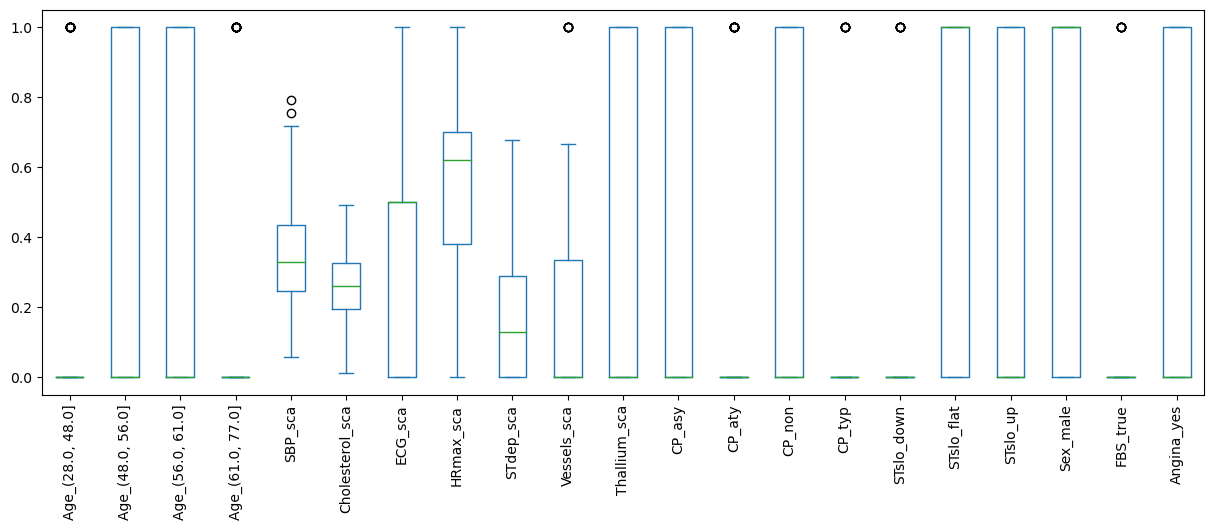

In [ ]:
X_test_set_03.plot.box(rot=90, figsize=(15, 5))

In [ ]:
'''
Write object to a comma-separated values (csv) file
'''
X_train_set_03.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_trainset03.csv', index=False)
X_test_set_03.to_csv('Classification_Diagnosis_of_Heart_Disease_ML_X_testset03.csv', index=False)